In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1. Load the Images and Labels
2. Preprocess the Images
3. Create Training and Validation Datasets
4. Build a Convolutional Neural Network (CNN) Model
5. Compile and Train the Model
6. Make Predictions


In [3]:
import pandas as pd
import numpy as np
train_fruits='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train/'

To count the total number of images in train_fruits, and to count the images in each subdirectory separately


**os.listdir(path):** Lists everything in a folder (both files and subfolders) at the specified path.

**os.walk(path):**  Walks through all folders and subfolders starting from the given path. It generates lists of all files and folders at each level.

**len():**  Counts how many items are in a list or collection.

In [4]:
import os
total_items=len([file for file in os.listdir(train_fruits)])
print(f'total number of items: {total_items}')

total number of items: 6


In [5]:
import os

# List to store all image file paths
image_files = []


# Walk through all subdirectories and files
for root, dirs, files in os.walk(train_fruits):
    for file in files:
        
        # Check if the file is an image (you can add more extensions if needed)
        if file.endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(root, file))

total_items = len(image_files)
print(f'Total number of images: {total_items}')

    




Total number of images: 10901


In [6]:
items_name=os.listdir(train_fruits)
items_name

['rottenbanana',
 'freshoranges',
 'rottenoranges',
 'freshbanana',
 'rottenapples',
 'freshapples']

# To count the total number of images in each subdirectory separately, 

In [7]:
rotten_banana_subdir='rottenbanana'
rotten_banana_subdir_path=os.path.join(train_fruits,rotten_banana_subdir)



total_rotten_banana_images=len([file for file in os.listdir(rotten_banana_subdir_path)])

print(f'total images in rotten_banana_subdir_path: {total_rotten_banana_images}')

total images in rotten_banana_subdir_path: 2224


In [8]:
# if i want to mention the image_extensions

rotten_banana_subdir='rottenbanana'
rotten_banana_subdir_path=os.path.join(train_fruits,rotten_banana_subdir)

image_extensions=('.png', '.jpg', '.jpeg')

total_rotten_banana_images=len([file for file in os.listdir(rotten_banana_subdir_path) if file.endswith(image_extensions)])

print(f'total images in rotten_banana_subdir_path with main extensions: {total_rotten_banana_images}')

total images in rotten_banana_subdir_path with main extensions: 2224


To count the **total number of images in each subdirectory separately**, you can use the following code. This code iterates through each subdirectory, counts the image files in each one, and prints the results:

In [9]:
list_of_items=os.listdir(train_fruits)

image_extensions=('.jpg', '.png', '.jpeg')

images_in_each_items={}


for item in list_of_items:
    subdir_path=os.path.join(train_fruits, item)
    if os.path.join(subdir_path):
        total_images_in_each_dir=len([file for file in os.listdir(subdir_path) if file.endswith(image_extensions)])
        images_in_each_items[item]=total_images_in_each_dir
        
        
for item, count in images_in_each_items.items():
    print(f'{item}: {count} images')

rottenbanana: 2224 images
freshoranges: 1466 images
rottenoranges: 1595 images
freshbanana: 1581 images
rottenapples: 2342 images
freshapples: 1693 images


In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import cv2
from PIL import Image



# open images of specific directory

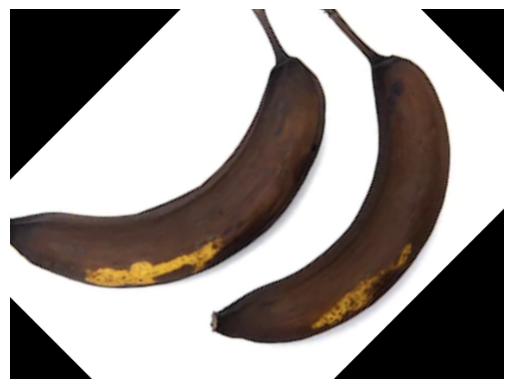

In [11]:

rotten_banana_subdir='rottenbanana'
rotten_banana_subdir_path=os.path.join(train_fruits,rotten_banana_subdir)

#get all images files in the subdirectory
images_rotten_banana=[file for file in os.listdir(rotten_banana_subdir_path) if file.endswith(('.png', '.jpg', '.jpeg'))]


image_path_rotten_banana=os.path.join(rotten_banana_subdir_path,images_rotten_banana[999])
image_rotten_banana=Image.open(image_path_rotten_banana)

plt.figure()
plt.imshow(image_rotten_banana)
plt.axis('off')  # Hide axis
plt.show()

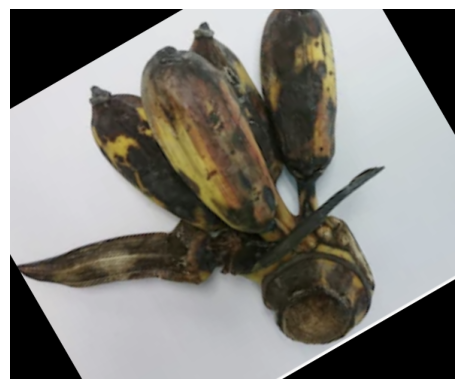

In [12]:
image_path_rotten_banana=os.path.join(rotten_banana_subdir_path,images_rotten_banana[1500])
image_rotten_banana=Image.open(image_path_rotten_banana)


plt.imshow(image_rotten_banana)
plt.axis('off')  
plt.show()

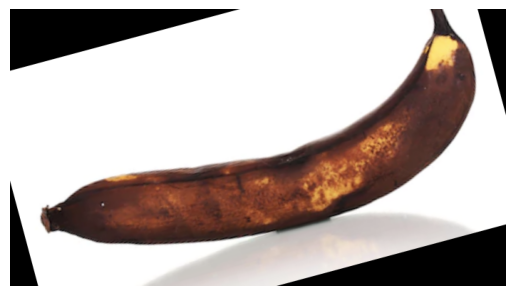

In [13]:
image_path_rotten_banana=os.path.join(rotten_banana_subdir_path,images_rotten_banana[2000])
image_rotten_banana=Image.open(image_path_rotten_banana)


plt.imshow(image_rotten_banana)
plt.axis('off')  
plt.show()

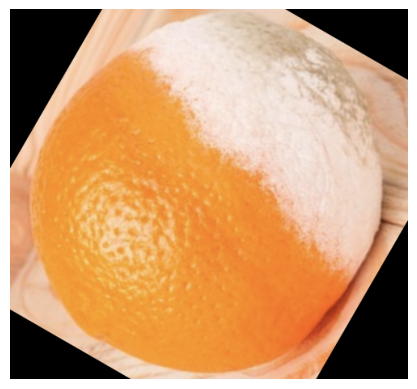

In [14]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
train_fruits = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train/'
rotten_oranges_subdir = 'rottenoranges'
rotten_oranges_subdir_path = os.path.join(train_fruits, rotten_oranges_subdir)

# Get all image files in the subdirectory
images_rotten_oranges = [file for file in os.listdir(rotten_oranges_subdir_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Path to the 1000th image
image_path_rotten_oranges = os.path.join(rotten_oranges_subdir_path, images_rotten_oranges[999])

# Open and show the image using PIL
image_rotten_oranges = Image.open(image_path_rotten_oranges)

# Display the image using matplotlib
plt.imshow(image_rotten_oranges)
plt.axis('off')  # Hide axis
plt.show()


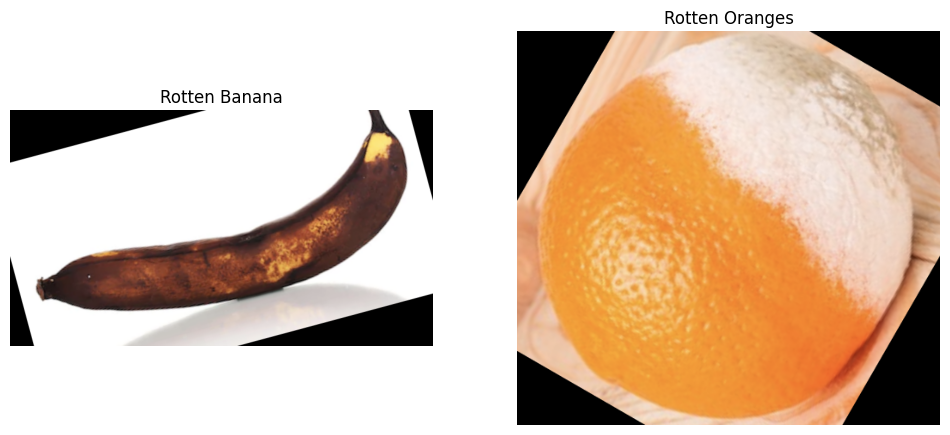

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display rotten banana image
axes[0].imshow(image_rotten_banana)
axes[0].set_title('Rotten Banana')
axes[0].axis('off')

# Display rotten oranges image
axes[1].imshow(image_rotten_oranges)
axes[1].set_title('Rotten Oranges')
axes[1].axis('off')  # Hide axis

plt.show()

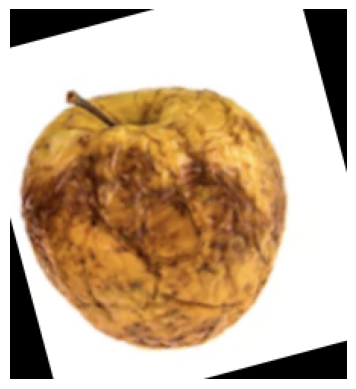

In [16]:

rotten_apples_subdir = 'rottenapples'
rotten_apples_subdir_path = os.path.join(train_fruits, rotten_apples_subdir)

# Get all image files in the subdirectory
images_rotten_apples = [file for file in os.listdir(rotten_apples_subdir_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Path to the 1000th image
image_path_rotten_apples = os.path.join(rotten_apples_subdir_path, images_rotten_apples[999])

# Open and show the image using PIL
image_rotten_apples = Image.open(image_path_rotten_apples)

# Display the image using matplotlib
plt.imshow(image_rotten_apples)
plt.axis('off')  # Hide axis
plt.show()

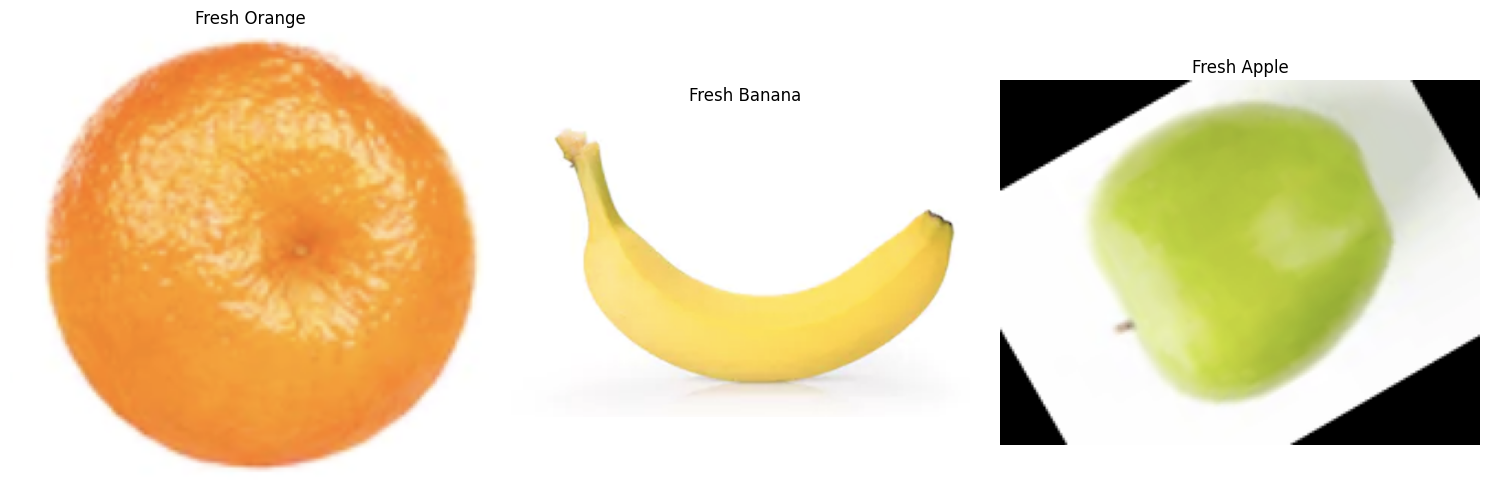

In [17]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
train_fruits = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train/'

# Define subdirectory names
fresh_oranges_subdir = 'freshoranges'
fresh_bananas_subdir = 'freshbanana'
fresh_apples_subdir = 'freshapples'

# Construct full paths
fresh_oranges_subdir_path = os.path.join(train_fruits, fresh_oranges_subdir)
fresh_bananas_subdir_path = os.path.join(train_fruits, fresh_bananas_subdir)
fresh_apples_subdir_path = os.path.join(train_fruits, fresh_apples_subdir)

# Get all image files in the subdirectories
images_fresh_oranges = [file for file in os.listdir(fresh_oranges_subdir_path) if file.endswith(('.png', '.jpg', '.jpeg'))]
images_fresh_bananas = [file for file in os.listdir(fresh_bananas_subdir_path) if file.endswith(('.png', '.jpg', '.jpeg'))]
images_fresh_apples = [file for file in os.listdir(fresh_apples_subdir_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Paths to the specific image in each subdirectory
image_path_fresh_oranges = os.path.join(fresh_oranges_subdir_path, images_fresh_oranges[99])
image_path_fresh_bananas = os.path.join(fresh_bananas_subdir_path, images_fresh_bananas[99])
image_path_fresh_apples = os.path.join(fresh_apples_subdir_path, images_fresh_apples[99])

# Open images
open_fresh_oranges = Image.open(image_path_fresh_oranges)
open_fresh_bananas = Image.open(image_path_fresh_bananas)
open_fresh_apples = Image.open(image_path_fresh_apples)

# Display images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display fresh orange image
axes[0].imshow(open_fresh_oranges)
axes[0].set_title('Fresh Orange')
axes[0].axis('off')

# Display fresh banana image
axes[1].imshow(open_fresh_bananas)
axes[1].set_title('Fresh Banana')
axes[1].axis('off')

# Display fresh apple image
axes[2].imshow(open_fresh_apples)
axes[2].set_title('Fresh Apple')
axes[2].axis('off')

plt.tight_layout()
plt.show()


#  Preprocess the Images


# Resize and normalize the images

In [18]:
import os
import random

# Directory where your images are stored
categories = ['rottenbanana', 'freshoranges', 'rottenoranges', 'freshbanana', 'rottenapples', 'freshapples']
selected_images = []

for category in categories:
    # Path to the category folder
    category_path = os.path.join(train_fruits, category)
    
    # Get all image files in the category folder
    images = [os.path.join(category_path, file) for file in os.listdir(category_path) if file.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Select only 1,000 images randomly
    selected_images.extend(random.sample(images, 500))

total_items = len(selected_images)
print(f'Total number of selected images: {total_items}')


Total number of selected images: 3000


In [19]:
import tensorflow as tf
import numpy as np

from PIL import Image

# Define the target size for resizing
target_size = (224, 224)

# To store processed images and labels
images = []
labels = []

# Mapping categories to label indices
label_map = {
    'freshapples': 0,
    'freshbanana': 1,
    'freshoranges': 2,
    'rottenapples': 3,
    'rottenbanana': 4,
    'rottenoranges': 5
}

# Iterate over each category
for category in categories:
    # Path to the category folder
    category_path = os.path.join(train_fruits, category)
    
    # Get all image files in the category folder
    images_list = [os.path.join(category_path, file) for file in os.listdir(category_path) if file.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Select only 1,000 images randomly
    selected_images = random.sample(images_list, 1000)
    
    # Process each selected image
    for image_path in selected_images:
        # Open the image
        image = Image.open(image_path)
        
        # Convert to RGB if needed
        if image.mode != 'RGB':
            image = image.convert('RGB')
        
        # Resize the image
        resized_image = image.resize(target_size)
        
        # Convert image to a numpy array and normalize
        image_array = np.array(resized_image) / 255.0
        
        # Append the processed image and corresponding label
        images.append(image_array)
        labels.append(label_map[category])

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# One-hot encode the labels
labels = tf.keras.utils.to_categorical(labels, num_classes=6)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val= train_test_split(images, labels, test_size=0.2, random_state=42)

In [21]:
#define the CNN model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model=Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])



#compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=32)


loss, accuracy=model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
150/150 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.5326 - loss: 2.4092 - val_accuracy: 0.8358 - val_loss: 0.4955
Epoch 2/3
150/150 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.8738 - loss: 0.3663 - val_accuracy: 0.8850 - val_loss: 0.3350
Epoch 3/3
150/150 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9111 - loss: 0.2500 - val_accuracy: 0.8792 - val_loss: 0.3672
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 353ms/step - accuracy: 0.8729 - loss: 0.3749
Validation Loss: 0.36720430850982666, Validation Accuracy: 0.8791666626930237


In [26]:
test_fruits='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/'
rotten_banana='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/rottenbanana/rotated_by_45_Screen Shot 2018-06-12 at 8.47.28 PM.png'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


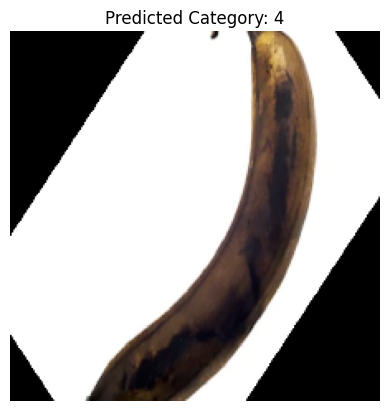

Predicted probabilities: [[1.1610794e-06 5.7638103e-05 9.3087647e-07 6.5019503e-07 9.9905354e-01
  8.8601891e-04]]


In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the image you want to test
image_path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/rottenbanana/rotated_by_45_Screen Shot 2018-06-12 at 8.47.28 PM.png'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224)) 
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0  # Normalize the image

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(f"Predicted Category: {predicted_class}")
plt.show()

# You can also print the predicted probabilities for all classes
print(f"Predicted probabilities: {predictions}")


This array corresponds to the following categories (in the order they were assigned during training):

* freshapples: 1.1610794e-06 (very low probability, almost 0%)
* freshbanana: 5.7638103e-05 (very low probability, almost 0%)
* freshoranges: 9.3087647e-07 (very low probability, almost 0%)
* rottenapples: 6.5019503e-07 (very low probability, almost 0%)
* rottenbanana: 9.9905354e-01 (99.9% probability)
* rottenoranges: 8.8601891e-04 (0.088% probability)

how they map:

* 'freshapples' - Index 0
* 'freshbanana' - Index 1
* 'freshoranges' - Index 2
* 'rottenapples' - Index 3
* 'rottenbanana' - Index 4
* 'rottenoranges' - Index 5